# Task # 3 - To Explore Unsupervised Machine Learning


**Created by- Aradhit Das
  Email id- aradhitd@gmail.com
  LinkedIn- https://www.linkedin.com/in/aradhit-das-5a646a191/**

### Importing Libraries and data

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [4]:
# Load the iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df["Species"] = iris.target

In [9]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [8]:
df["Species"] = df["Species"].apply(lambda x: iris.target_names[x])

In [10]:
df["Species"].value_counts()

virginica     50
versicolor    50
setosa        50
Name: Species, dtype: int64

### Searching for the optimal number of clusters

In [12]:
from sklearn.cluster import KMeans
X = df.drop(labels=["Species"], axis=1).values

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", n_init=10, max_iter=300, n_jobs=-1)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

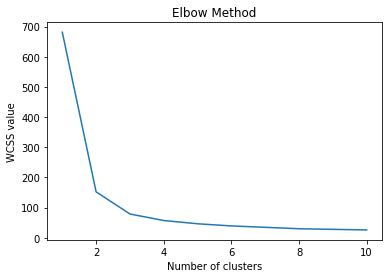

In [13]:
plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS value")
plt.show();

**From the above graph, we can say that the optimal number of clusters is 3**

### Modelling 

In [14]:
# Applying the k-means cluster algorithm
kmeans = KMeans(n_clusters=3, init="k-means++", n_init=10, max_iter=300)
y_preds = kmeans.fit_predict(X)

### Visualizing the clusters

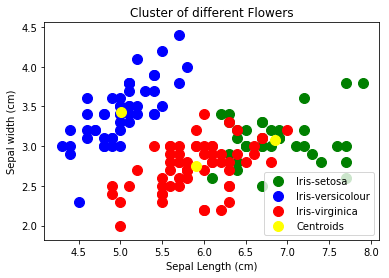

In [15]:
# Visualising the clusters
plt.scatter(X[y_preds == 0, 0], X[y_preds == 0, 1], s=100, c='green', label='Iris-setosa')
plt.scatter(X[y_preds == 1, 0], X[y_preds == 1, 1], s=100, c='blue', label='Iris-versicolour')
plt.scatter(X[y_preds == 2, 0], X[y_preds == 2, 1], s=100, c='red', label='Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.title("Cluster of different Flowers")
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal width (cm)')
plt.legend()
plt.show()